<a href="https://colab.research.google.com/github/utkuyucel/Deep-Learning/blob/master/Remember_Simple_is_the_best_of_all_%3E_84_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Conv2D,DepthwiseConv2D, MaxPooling2D, Flatten, Activation, Input, Dense, ZeroPadding2D, AveragePooling2D, BatchNormalization, Add, concatenate,Dropout
from keras.models import Model, load_model
from keras.utils import to_categorical, plot_model, layer_utils
from matplotlib.pyplot import imshow
from keras.datasets import cifar10
from tensorboardcolab import *
import keras
import matplotlib.pyplot as plt
import keras.backend as K

#K.set_image_data_format("channels_last")
#K.set_learning_phase(1)

In [0]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255.
X_test /= 255.

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
def res(X_input, F1):
  
  
  X1 = Conv2D(F1, (3,3), strides = (1,1), padding = "same")(X_input)
  X1 = BatchNormalization()(X1)
  X1 = Activation("relu")(X1)
  
  X2 = Conv2D(F1, (3,3), strides = (1,1), padding = "same")(X1)
  X2 = BatchNormalization()(X2)
  
  C = keras.layers.concatenate([X1,X2])
  
  M = MaxPooling2D((2,2))(C)
  
  return M
  
  

In [0]:
def model(X_input = (32,32,3)):
  
  X_input = Input(X_input)
  
  X = res(X_input,64)
  X = res(X,128)
  X = res(X,256)
  X = res(X,128)
  
  
  X = Flatten()(X)
  X = Dense(10, activation = "softmax")(X)
  
  model = Model(inputs = X_input, outputs = X)
  
  return model

In [0]:
model = model((32,32,3))


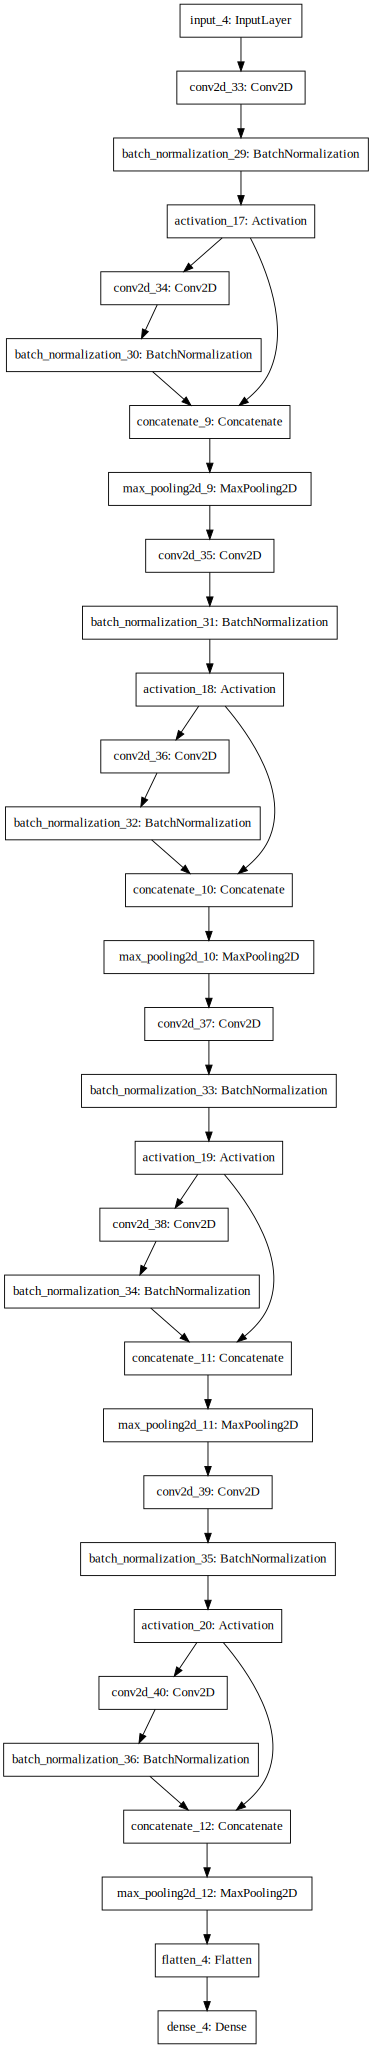

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [0]:
model.load_weights("model.h5")

In [0]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [44]:
#tbc = TensorBoardColab()
history = model.fit(X_train, y_train, epochs = 20, batch_size = 50, validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 28s 555us/step - loss: 0.0110 - acc: 0.9965 - val_loss: 1.1187 - val_acc: 0.8291
Epoch 2/20
50000/50000 [==============================] - 25s 498us/step - loss: 0.0071 - acc: 0.9975 - val_loss: 1.4227 - val_acc: 0.8061
Epoch 3/20
50000/50000 [==============================] - 25s 505us/step - loss: 0.0100 - acc: 0.9970 - val_loss: 1.2722 - val_acc: 0.8232
Epoch 4/20
50000/50000 [==============================] - 25s 506us/step - loss: 0.0098 - acc: 0.9968 - val_loss: 1.2718 - val_acc: 0.8323
Epoch 5/20
50000/50000 [==============================] - 26s 515us/step - loss: 0.0097 - acc: 0.9968 - val_loss: 1.2257 - val_acc: 0.8307
Epoch 6/20
50000/50000 [==============================] - 25s 508us/step - loss: 0.0062 - acc: 0.9981 - val_loss: 1.1874 - val_acc: 0.8347
Epoch 7/20
50000/50000 [==============================] - 26s 513us/step - loss: 0.0096 - acc: 0.9969 - val_loss: 1.

In [0]:
model.save_weights("model.h5")

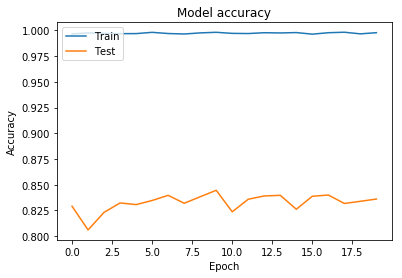

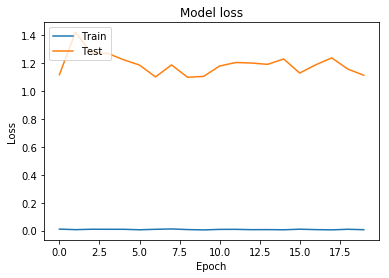

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()